<a href="https://colab.research.google.com/github/surensnyper/class_machine_vision/blob/main/CameraCalibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# https://www.youtube.com/watch?v=E3Lg4aZVCAU - Tutorial video of OpenCV
import numpy as np
import cv2 as cv
import glob

(1280, 960, 3)


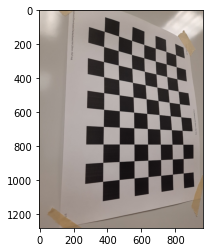

In [124]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Colorful
img = "12.jpg"
img = cv.imread(img) # reads image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
print(img.shape)

# Gray
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray)
print(gray.shape)

In [100]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [101]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

In [102]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('*.jpg')

In [103]:
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        # cv.imshow(gray)
        cv.waitKey(500)
cv.destroyAllWindows()